In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pfe import Mesh, Model, Constant, Function
from pfe.interpolation import Lagrange2
from pfe.models import lpe_2d

In [5]:
freq = 2.9
omega = 2*np.pi*freq

def g(xy):
    phi = np.exp(-1j*omega*xy[0,:])
    theta = np.arctan2(xy[1,:], xy[0,:])
    dphidr = -1j*omega*phi*np.cos(theta)
    return(dphidr+1j*omega*phi)

Opening mesh domain1.msh
Reading 16921 nodes
Reading elements...
* 212 elements Line 3
* 8354 elements Triangle 6
Reading groups...
* group 0: 8354 elements
* group 1: 212 elements

Allocating fields...
* Field phi: 16921 DOFs
Total: 16921 DOFs

Building model...
* Group Main
* Group CBC
Time: 1.3045s
Global system: 16921 DOFs, 192991 non-zero entries

Solving model...
Time: 0.5998s


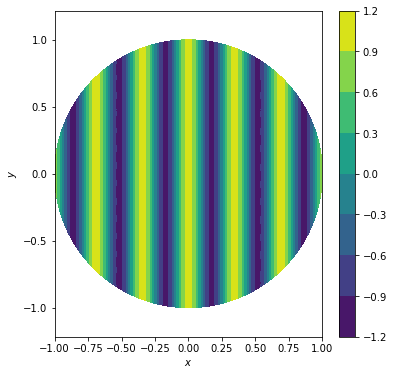

In [6]:
mesh = Mesh('domain1.msh', num_dim=2)

model = Model()

model.parameters['omega'] = Constant(omega)
model.parameters['rho0'] = Constant(1.0)
model.parameters['c0'] = Constant(1.0)
model.parameters['u0'] = Constant(0.0)
model.parameters['v0'] = Constant(0.0)

model.fields['phi'] = Lagrange2(mesh)

model.add_term(lpe_2d.Main(mesh.group(0)))
model.add_term(lpe_2d.CBC(mesh.group(1), Function(g)))

model.declare_fields()
model.build()
model.solve()

plt.figure(figsize=(6,6))
model.fields['phi'].plot(np.real(model.solution))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.axis("equal")
plt.colorbar()
plt.show()

Opening mesh domain2.msh
Reading 18276 nodes
Reading elements...
* 244 elements Line 3
* 9016 elements Triangle 6
Reading groups...
* group 0: 9016 elements
* group 1: 212 elements
* group 2: 32 elements

Allocating fields...
* Field phi: 18276 DOFs
Total: 18276 DOFs

Building model...
* Group Main
* Group CBC
* Group Wall
Time: 1.3368s
Global system: 18276 DOFs, 208344 non-zero entries

Solving model...
Time: 0.5035s


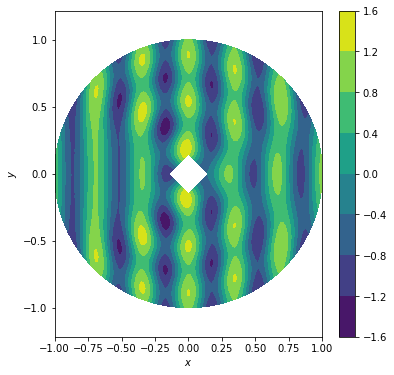

In [7]:
mesh = Mesh('domain2.msh', num_dim=2)

model = Model()

model.parameters['omega'] = Constant(omega)
model.parameters['rho0'] = Constant(1.0)
model.parameters['c0'] = Constant(1.0)
model.parameters['u0'] = Constant(0.0)
model.parameters['v0'] = Constant(0.0)

model.fields['phi'] = Lagrange2(mesh)

model.add_term(lpe_2d.Main(mesh.group(0)))
model.add_term(lpe_2d.CBC(mesh.group(1), Function(g)))
model.add_term(lpe_2d.Wall(mesh.group(2)))

model.declare_fields()
model.build()
model.solve()

plt.figure(figsize=(6,6))
model.fields['phi'].plot(np.real(model.solution))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.axis("equal")
plt.colorbar()
plt.show()